Nesse arquivo foi usada a seguinte estratégia:
Utilizei um recurso chamado [DTW](dtw.r-forge.r-project.org) onde se calcula a dissimilaridades entre séries.
Nesse caso entre cada movimento ou path realizado pelo usuario podemos contabilizar o quão similar eles são entre eles.
Dessa forma podemos calcular uma `distancia` e assim realizar procedimentos como clusterizações e até classificações. Nesse caso utilizei um simples KNN para realizar a classificação binária.

Importante dizer que esse método (DTW) é robusto para séries com múltiplas variaveis (multivariate).

In [150]:
library(dtw)
library(KODAMA)
library(caret)
library(pROC)

groups <- read.csv(file="./MovementAAL/groups/MovementAAL_DatasetGroup.csv",head=TRUE,sep=",")
targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")

#Group 1
allDataGroup1<-list()
allDataGroup1Target<-list()
groups1 = groups[groups$dataset_ID==1, ]

index<-1
for (id in groups1$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup1[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup1Target[index]<-targetAll[[2]][id]
    index<-index+1
}

kdist <- dist(allDataGroup1, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [151]:
target <- unlist(allDataGroup1Target)
allDataGroup1TargetFrame = as.data.frame(target)
train <- createDataPartition(allDataGroup1TargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataGroup1TargetFrame$target


#### Média e Desvio padrão respectivamente.
##### Group 1, com Cross Validation tipo 10-fold

In [152]:
allAccuracyGroup1 <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataGroup1TargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracyGroup1 <- c(allAccuracyGroup1,matrix[3]$overall[[1]])
}
mean(allAccuracyGroup1)
sd(allAccuracyGroup1)

[1] 0.95

[1] 0.04230985

In [153]:
#Group 2


allDataGroup2<-list()
groups2 = groups[groups$dataset_ID==2, ]
allDataGroup2Target<-list()
index<-1
for (id in groups2$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup2[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup2Target[index]<-targetAll[[2]][id]
    index<-index+1
}


kdist <- dist(allDataGroup2, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [154]:
target <- unlist(allDataGroup2Target)
allDataGroup2TargetFrame = as.data.frame(target)
train <- createDataPartition(allDataGroup2TargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataGroup2TargetFrame$target

#### Média e Desvio padrão respectivamente.
##### Group 2, com Cross Validation tipo 10-fold

In [155]:
allAccuracyGroup2 <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataGroup2TargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracyGroup2 <- c(allAccuracyGroup2,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup2)
sd(allAccuracyGroup2)

[1] 0.9225806

[1] 0.04354507

In [156]:
#Group 3


allDataGroup3<-list()
groups3 = groups[groups$dataset_ID==3, ]
allDataGroup3Target<-list()
index<-1
for (id in groups3$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup3[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup3Target[index]<-targetAll[[2]][id]
    index<-index+1
}


kdist <- dist(allDataGroup3, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [157]:
target <- unlist(allDataGroup3Target)
allDataGroup3TargetFrame = as.data.frame(target)
train <- createDataPartition(allDataGroup3TargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataGroup3TargetFrame$target

#### Média e Desvio padrão respectivamente.
##### Group 3, com Cross Validation tipo 10-fold

In [158]:
allAccuracyGroup3 <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataGroup3TargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracyGroup3 <- c(allAccuracyGroup3,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup3)
sd(allAccuracyGroup3)

[1] 0.8612903

[1] 0.08873411

In [159]:
#All DataBases

targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")
allData<-list()
allDataTarget<-list()
index<-1
for (id in targetAll$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allData[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataTarget[index]<-targetAll[[2]][id]
    index<-index+1
}

kdist <- dist(allData, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [160]:
target <- unlist(allDataTarget)
allDataTargetFrame = as.data.frame(target)
train <- createDataPartition(allDataTargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataTargetFrame$target

#### Média e Desvio padrão respectivamente.
##### Todos os Groups em uma base apenas, com Cross Validation tipo 10-fold

In [161]:
allAccuracy <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataTargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracy <- c(allAccuracyGroup3,matrix[3]$overall[[1]])
}

mean(allAccuracy)
sd(allAccuracy)

[1] 0.8642291

[1] 0.08474296

#### Matrix de confusão
#### Todos os Groups em uma base apenas

In [238]:
#All groups datasets Confusion Matrix 
target <- unlist(allDataTarget)
allDataTargetFrame = as.data.frame(target)
train <- createDataPartition(allDataTargetFrame$target, p = .7, list = TRUE,times=1)
y <- allDataTargetFrame$target
test  <- (1:nrow(allDataTargetFrame))[-train[[1]]]
preds <- knn.predict(train[[1]], test,y, kdistM, k=5,agg.meth="majority") 
matrix <- confusionMatrix(preds, y[test])
matrix


Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 41  8
        1   3 42
                                          
               Accuracy : 0.883           
                 95% CI : (0.8003, 0.9401)
    No Information Rate : 0.5319          
    P-Value [Acc > NIR] : 3.359e-13       
                                          
                  Kappa : 0.7666          
 Mcnemar's Test P-Value : 0.2278          
                                          
            Sensitivity : 0.9318          
            Specificity : 0.8400          
         Pos Pred Value : 0.8367          
         Neg Pred Value : 0.9333          
             Prevalence : 0.4681          
         Detection Rate : 0.4362          
   Detection Prevalence : 0.5213          
      Balanced Accuracy : 0.8859          
                                          
       'Positive' Class : -1              
                                          

#### Curva ROC e AUC
#### Todos os Groups em uma base apenas


Call:
roc.default(response = classes, predictor = outcome, levels = c("No",     "Yes"))

Data: outcome in 44 controls (classes No) > 50 cases (classes Yes).
Area under the curve: 0.9259

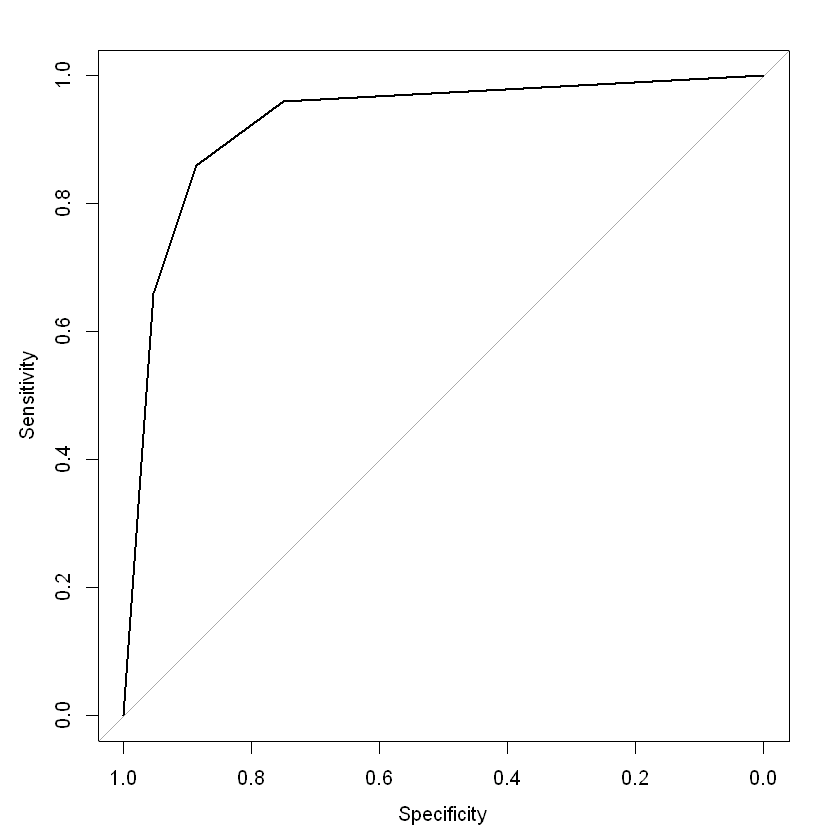

In [240]:
#ROC CURVE AND AUC
predsProb <- t(knn.probability(train[[1]], test,y, kdistM, k=3))
outcome<- predsProb[,1]
classes <- factor(unlist( y[test]),labels=c("No", "Yes"))
rocobj <- roc(classes, outcome,levels=c("No", "Yes"))
plot(rocobj)